### Definir o Contexto do Problema:
<p style="text-indent: 30px;">-> Qual é a natureza do problema?</p>
<p style="text-indent: 60px;">A natureza desse problema é identificar e classificar transações financeiras em legítimas e fraudulentas com base nos padrões dos dados.</p>

<p style="text-indent: 30px;">-> Qual é o impacto das fraudes?</p>
<p style="text-indent: 60px;">O impacto das fraudes é alto, já que causa prejuízos financeiros às instituições financeiras e traz transtorno e desconforto ao cliente.</p>
<p style="text-indent: 60px;">Uma detecção eficiente reduz o prejuízo e o transtorno, além de aumentar a confiança do cliente.</p>

### Estabelecer os Objetivos:
<p style="text-indent: 30px;">-> Objetivo Geral:</p>
<p style="text-indent: 60px;">O objetivo é conseguir identificar padrões em transações fraudulentas, a fim de bloqueá-las com a menor taxa de erro.</p>

<p style="text-indent: 30px;">-> Objetivos Específicos:</p>
<p style="text-indent: 60px;">1. Realizar uma análise exploratória descritiva para identificar padrões em transações e, a partir dos insights obtidos,</p>
<p style="text-indent: 60px;">2. Desenvolver um modelo de classificação que maximize a precisão na identificação dessas transações fraudulentas.</p>
<p style="text-indent: 60px;">3. Avaliar o desempenho dos modelos de classificação utilizando métricas como acurácia, precisão, recall e F1-score,</p>
<p style="text-indent: 60px;">para garantir que o modelo atenda aos critérios de sucesso definidos.</p>

### Requisitos e Restrições:
<p style="text-indent: 30px;">-> Quais dados estão disponíveis?</p>
<p style="text-indent: 60px;">Os dados disponíveis são o "train_transaction", que contém informações sobre as transações financeiras realizadas pelos clientes.</p>
<p style="text-indent: 60px;">Restrições de tempo e recursos.</p>

### Compreensão dos Stakeholders:
<p style="text-indent: 60px;">Quem são os interessados no projeto?</p>
<p style="text-indent: 60px;">O que eles consideram sucesso?</p>

### Levantamento de Hipóteses:
<p style="text-indent: 30px;">-> Quais hipóteses iniciais você pode formular?</p>
<p style="text-indent: 60px;">1. Transações fraudulentas tendem a apresentar padrões de comportamento diferentes em comparação com transações legítimas.</p>
<p style="text-indent: 60px;">2. Transações fraudulentas ocorrem com mais frequência em determinados horários ou dias da semana?</p>
<p style="text-indent: 60px;">3. Transações fraudulentas geralmente têm valores mais altos ou mais baixos do que as transações legítimas?</p>
<p style="text-indent: 60px;">4. Existe variação no valor debitado e recebido nas fraudes ou nas legítimas, algum tipo de taxa?</p>
<p style="text-indent: 60px;">5. Existem correlações entre características específicas das transações e a probabilidade de fraude?</p>


# Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import resample
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from xgboost import XGBClassifier

# Exploração e análise de dados (EDA)

### Carregamento e Visualização Inicial dos Dados

In [2]:
df = pd.read_csv(r"C:\Users\jrfer\Documents\repositorio\projeto_02\dados\dados.csv")

In [3]:
df.head().T

,0,1,2,3,4
step,1,1,1,1,1
type,PAYMENT,PAYMENT,TRANSFER,CASH_OUT,PAYMENT
amount,9839.64,1864.28,181.0,181.0,11668.14
nameOrig,C1231006815,C1666544295,C1305486145,C840083671,C2048537720
oldbalanceOrg,170136.0,21249.0,181.0,181.0,41554.0
newbalanceOrig,160296.36,19384.72,0.0,0.0,29885.86
nameDest,M1979787155,M2044282225,C553264065,C38997010,M1230701703
oldbalanceDest,0.0,0.0,0.0,21182.0,0.0
newbalanceDest,0.0,0.0,0.0,0.0,0.0
isFraud,0,0,1,1,0


### Descrição das Variáveis:

<p style="text-indent: 30px;">**step**: Número de horas desde o início da simulação. Representa o tempo relativo em que as transações ocorrem.</p>

<p style="text-indent: 30px;">**type**: O tipo de transação que está sendo feita. Pode incluir:</p>
<ul style="text-indent: 60px;">
    <li><strong>CASH-IN:</strong> Depósito em dinheiro.</li>
    <li><strong>CASH-OUT:</strong> Saque em dinheiro.</li>
    <li><strong>DEBIT:</strong> Débito de uma conta.</li>
    <li><strong>PAYMENT:</strong> Pagamento de serviços ou bens.</li>
    <li><strong>TRANSFER:</strong> Transferência de fundos entre contas.</li>
</ul>

<p style="text-indent: 30px;">**amount**: O valor da transação.</p>

<p style="text-indent: 30px;">**nameOrig**: Identificador da conta de origem (a conta que está enviando o dinheiro).</p>

<p style="text-indent: 30px;">**oldbalanceOrg**: Saldo na conta de origem antes da transação.</p>

<p style="text-indent: 30px;">**newbalanceOrig**: Saldo na conta de origem após a transação.</p>

<p style="text-indent: 30px;">**nameDest**: Identificador da conta de destino (a conta que está recebendo o dinheiro).</p>

<p style="text-indent: 30px;">**oldbalanceDest**: Saldo na conta de destino antes da transação.</p>

<p style="text-indent: 30px;">**newbalanceDest**: Saldo na conta de destino após a transação.</p>

<p style="text-indent: 30px;">**isFraud**: A variável alvo indicando se a transação foi fraudulenta (1 = fraude, 0 = não fraude). Representa tentativas de fraude simuladas.</p>

<p style="text-indent: 30px;">**isFlaggedFraud**: Indica se a transação foi sinalizada por exceder um limite específico (geralmente, quando tentam transferir grandes quantias em uma única transação).</p>


### Verificação de Tipos de Dados

In [4]:
df.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

### Análise Descritiva

In [5]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


### ANÁLISE DOS TIPOS DE TRANSAÇÕES

<p style="text-indent: 30px;">Neste projeto, estamos explorando os tipos de transações que apresentam os maiores valores e identificando quais desses tipos estão mais frequentemente associados a fraudes. Em nossa análise, diferenciamos entre duas categorias:</p>

<ul style="text-indent: 60px;">
    <li><strong>Fraud:</strong> Indica uma tentativa de fraude.</li>
    <li><strong>FlaggedFraud:</strong> Refere-se a transações que tentam movimentar quantias superiores ao limite especificado.</li>
</ul>

<p style="text-indent: 30px;">Essa investigação é crucial para entender melhor os padrões de comportamento fraudulentos e aprimorar as medidas de prevenção.</p>


<p style="text-indent: 30px;">As transações com os maiores valores movimentados concentram-se nas categorias <strong>Transfer</strong>, <strong>Cash_out</strong> e <strong>Cash_in</strong>. Observamos que todas as tentativas de fraude (<strong>isFraud</strong>) ocorreram no tipo <strong>Cash_out</strong>, enquanto as transações sinalizadas como suspeitas (<strong>isFlaggedFraud</strong>) estavam exclusivamente no tipo <strong>Transfer</strong>.</p>

<p style="text-indent: 30px;">Esses dados indicam que as fraudes se manifestam principalmente nos dois tipos de transações mais comuns, sugerindo que essas categorias são especialmente vulneráveis e requerem monitoramento cuidadoso.</p>


In [6]:
# Criando uma tabela dinâmica (pivot table) para agrupar as informações
# A tabela exibe as somas e desvios padrão das colunas 'amount', 'isFraud' e 'isFlaggedFraud', agrupadas por 'type'
dados_pivo = pd.pivot_table(
    df, 
    index='type',                          # Indexando pela coluna 'type' para agrupar os tipos de transações
    values=['amount', 'isFraud', 'isFlaggedFraud'],  # Selecionando colunas a serem analisadas
    aggfunc=['sum', 'std']                 # Aplicando soma e desvio padrão como funções de agregação
)

# Definindo uma paleta de cores em tons de vermelho para o gradiente de fundo
paleta = sns.light_palette("red", as_cmap=True)

# Aplicando o gradiente de cor na tabela para destacar valores mais altos e mais baixos
dados_pivo.style.background_gradient(cmap=paleta)


<p style="text-indent: 30px;"><strong>ANALISANDO DIFERENÇAS NOS VALORES TRANSFERIDOS, POSSÍVEIS TAXAS</strong></p>

<p style="text-indent: 30px;">Alguns valores movimentados (<strong>amount</strong>) apresentam uma diferença do valor <strong>oldbalanceOrg - newbalanceOrig</strong>, que é o valor que realmente saiu ou entrou na conta do cliente. Esse valor pode identificar algum tipo de taxa.</p>

<p style="text-indent: 30px;">Vamos verificar se a presença desse valor de possível taxa tem algum tipo de relação com as fraudes.</p>


In [7]:
# Criando uma coluna 'taxa' para indicar a presença de uma possível taxa em cada transação
# A coluna será 1 se houver diferença entre o valor da transação ('amount') e a mudança no saldo ('oldbalanceOrg' - 'newbalanceOrig'), sugerindo uma taxa

# Pré-processa as colunas para evitar o uso repetido de 'round' e 'abs'
df['valor_arredondado'] = abs(round(df['amount']))
df['saldo_movimentado'] = abs(round(df['oldbalanceOrg'] - df['newbalanceOrig']))

# Usa np.where para criar a coluna 'taxa' de maneira vetorizada
df['taxa'] = np.where(df['valor_arredondado'] != df['saldo_movimentado'], 1, 0)

# Exclui as colunas intermediárias se não forem mais necessárias
df.drop(columns=['valor_arredondado', 'saldo_movimentado'], inplace=True)

# Exibindo a transposta do DataFrame
df.T



,0,1,2,3,4,5,6,7,8,9,...,6362610,6362611,6362612,6362613,6362614,6362615,6362616,6362617,6362618,6362619
step,1,1,1,1,1,1,1,1,1,1,...,742,742,743,743,743,743,743,743,743,743
type,PAYMENT,PAYMENT,TRANSFER,CASH_OUT,PAYMENT,PAYMENT,PAYMENT,PAYMENT,PAYMENT,DEBIT,...,TRANSFER,CASH_OUT,TRANSFER,CASH_OUT,TRANSFER,CASH_OUT,TRANSFER,CASH_OUT,TRANSFER,CASH_OUT
amount,9839.64,1864.28,181.0,181.0,11668.14,7817.71,7107.77,7861.64,4024.36,5337.77,...,63416.99,63416.99,1258818.82,1258818.82,339682.13,339682.13,6311409.28,6311409.28,850002.52,850002.52
nameOrig,C1231006815,C1666544295,C1305486145,C840083671,C2048537720,C90045638,C154988899,C1912850431,C1265012928,C712410124,...,C778071008,C994950684,C1531301470,C1436118706,C2013999242,C786484425,C1529008245,C1162922333,C1685995037,C1280323807
oldbalanceOrg,170136.0,21249.0,181.0,181.0,41554.0,53860.0,183195.0,176087.23,2671.0,41720.0,...,63416.99,63416.99,1258818.82,1258818.82,339682.13,339682.13,6311409.28,6311409.28,850002.52,850002.52
newbalanceOrig,160296.36,19384.72,0.0,0.0,29885.86,46042.29,176087.23,168225.59,0.0,36382.23,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
nameDest,M1979787155,M2044282225,C553264065,C38997010,M1230701703,M573487274,M408069119,M633326333,M1176932104,C195600860,...,C1812552860,C1662241365,C1470998563,C1240760502,C1850423904,C776919290,C1881841831,C1365125890,C2080388513,C873221189
oldbalanceDest,0.0,0.0,0.0,21182.0,0.0,0.0,0.0,0.0,0.0,41898.0,...,0.0,276433.18,0.0,503464.5,0.0,0.0,0.0,68488.84,0.0,6510099.11
newbalanceDest,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40348.79,...,0.0,339850.17,0.0,1762283.33,0.0,339682.13,0.0,6379898.11,0.0,7360101.63
isFraud,0,0,1,1,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1


In [8]:
# Agrupando os dados com base nas colunas 'taxa' e 'isFraud'
# A função groupby permite calcular o número de ocorrências únicas para cada combinação de 'taxa' e 'isFraud'

df_group = df.groupby(['taxa', 'isFraud']).size().reset_index(name='count')

# Exibindo o DataFrame resultante, que mostra a contagem de transações para cada combinação de 'taxa' e 'isFraud'
df_group


,taxa,isFraud,count
0,0,0,2749180
1,0,1,8168
2,1,0,3605227
3,1,1,45


<p style="text-indent: 30px;"><strong>Analisando essa tabela podemos ver que, nos dados onde existem taxa, o número de fraudes é menor. Isso talvez não signifique uma relação, porém seria interessante deixar essa coluna de taxa para o modelo analisar e verificaremos depois se existe melhoria ou piora na avaliação.</strong></p>

<p style="text-indent: 30px;">Diferente de <strong>isFraud</strong>, a variável <strong>isFlaggedFraud</strong> tem um comportamento oposto: os dados que não possuem taxas não têm uma movimentação suspeita.</p>


In [9]:
# Agrupando os dados com base nas colunas 'taxa' e 'isFlaggedFraud'
# A função groupby permite calcular o número de ocorrências para cada combinação de 'taxa' e 'isFlaggedFraud'

df_group = df.groupby(['taxa', 'isFlaggedFraud']).size().reset_index(name='count')

# Exibindo o DataFrame resultante, que mostra a contagem de transações para cada combinação de 'taxa' e 'isFlaggedFraud'
df_group


,taxa,isFlaggedFraud,count
0,0,0,2757348
1,1,0,3605256
2,1,1,16


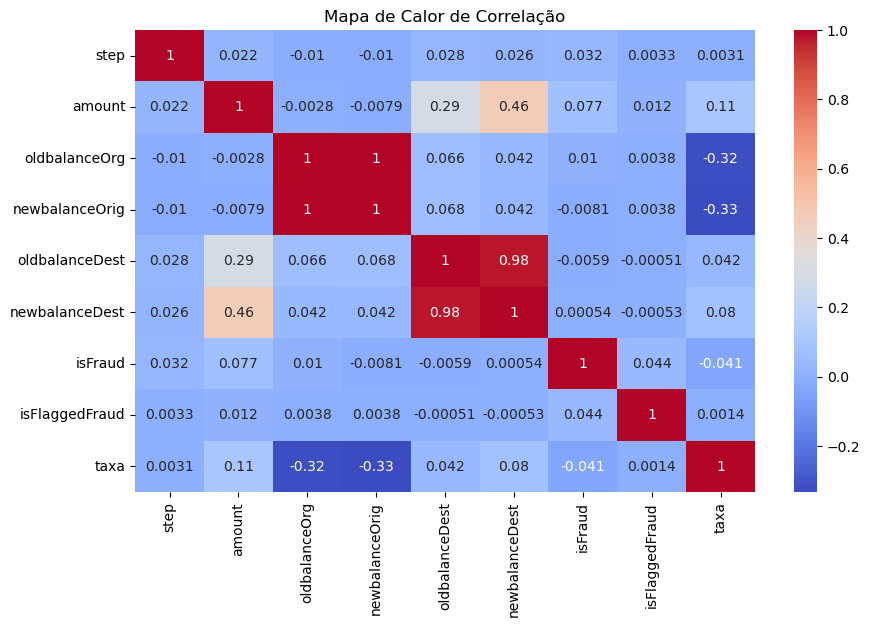

In [10]:
# Selecionando apenas as colunas numéricas do DataFrame
# A função select_dtypes permite selecionar colunas de tipos específicos, como numérico, categórico, etc.
df_num = df.select_dtypes(include=['number'])

# Configurando o tamanho da figura para o gráfico de mapa de calor
plt.figure(figsize=(10, 6))

# Criando o mapa de calor das correlações entre as variáveis numéricas
# df_num.corr() calcula a matriz de correlação entre as colunas numéricas
# sns.heatmap exibe o gráfico de calor, com 'annot=True' para mostrar os valores de correlação e 'cmap' para definir a paleta de cores
sns.heatmap(df_num.corr(), annot=True, cmap='coolwarm')

# Adicionando um título ao gráfico para contextualizar o conteúdo
plt.title("Mapa de Calor de Correlação")

# Exibindo o gráfico
plt.show()


<p style="text-indent: 30px;"><strong>ANÁLISE DE TRANSAÇÕES DIÁRIAS</strong></p>

<p style="text-indent: 30px;">Vamos analisar todas as transações feitas por dia, considerando que cada <strong>step</strong> equivale a 1 hora.</p>

<p style="text-indent: 30px;">Entre os dias 5 e 16, temos uma média alta de transações. Vamos analisar e ver se existe alguma relação com o número de <strong>isFraud</strong> e <strong>isFlaggedFraud</strong>.</p>


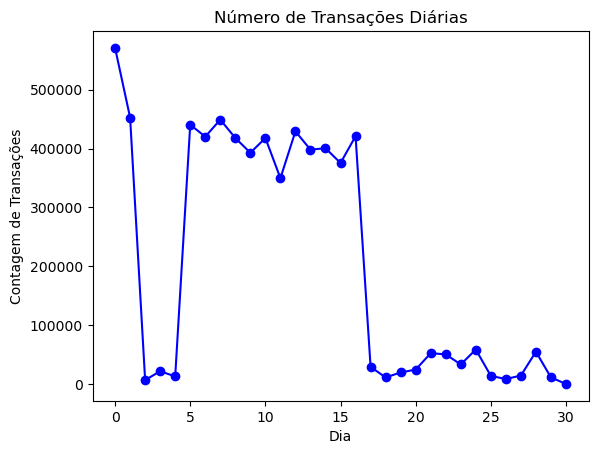

,dia,count
0,0,571039
1,1,452761
2,2,6749
3,3,21904
4,4,12995
5,5,440626
6,6,420282
7,7,449147
8,8,418103
9,9,392886


In [11]:
# Agrupando as transações por 'step' e contando o número de transações para cada hora
# O método groupby cria agrupamentos baseados em 'step' e 'size' conta as ocorrências, 
# com reset_index renomeando a coluna para 'count'
df_total = df.groupby(['step'])['amount'].size().reset_index(name='count')

# Calculando o número do dia (considerando que cada 24 steps representam um dia)
# Aqui, a coluna 'dia' é obtida dividindo os valores de 'step' por 24 e usando divisão inteira
df_total['dia'] = df_total['step'] // 24

# Agrupando os dados novamente, agora por dia, e somando o número de transações diárias
# Agrupamos pela coluna 'dia' e somamos os valores de 'count' para cada dia
df_total = df_total.groupby(['dia'])['count'].sum().reset_index(name='count')

# Plotando o gráfico do número de transações diárias
# Usamos o marker 'o' para exibir pontos e a cor azul para a linha do gráfico
plt.plot(df_total['dia'], df_total['count'], marker='o', color='blue')
plt.xlabel("Dia")
plt.ylabel("Contagem de Transações")
plt.title("Número de Transações Diárias")
plt.show()

# Configurando o pandas para exibir todas as colunas do DataFrame ao imprimir
pd.set_option('display.max_columns', None)

# Exibindo o DataFrame resultante, que mostra o total de transações por dia
df_total



<p style="text-indent: 30px;"><strong>ANÁLISE DE 'ISFRAUDE' E 'ISFLAGGEDFRAUD' POR DIA</strong></p>

<p style="text-indent: 30px;">Agora será feita uma análise de quantas <strong>isFraud</strong> e <strong>isFlaggedFraud</strong> acontecem por dia, considerando que a variável <strong>Step</strong> se refere a horas.</p>

<p style="text-indent: 30px;">Além da quantidade, vamos analisar o valor total por dia e tentar encontrar algum tipo de padrão, como sazonalidade, por exemplo.</p>


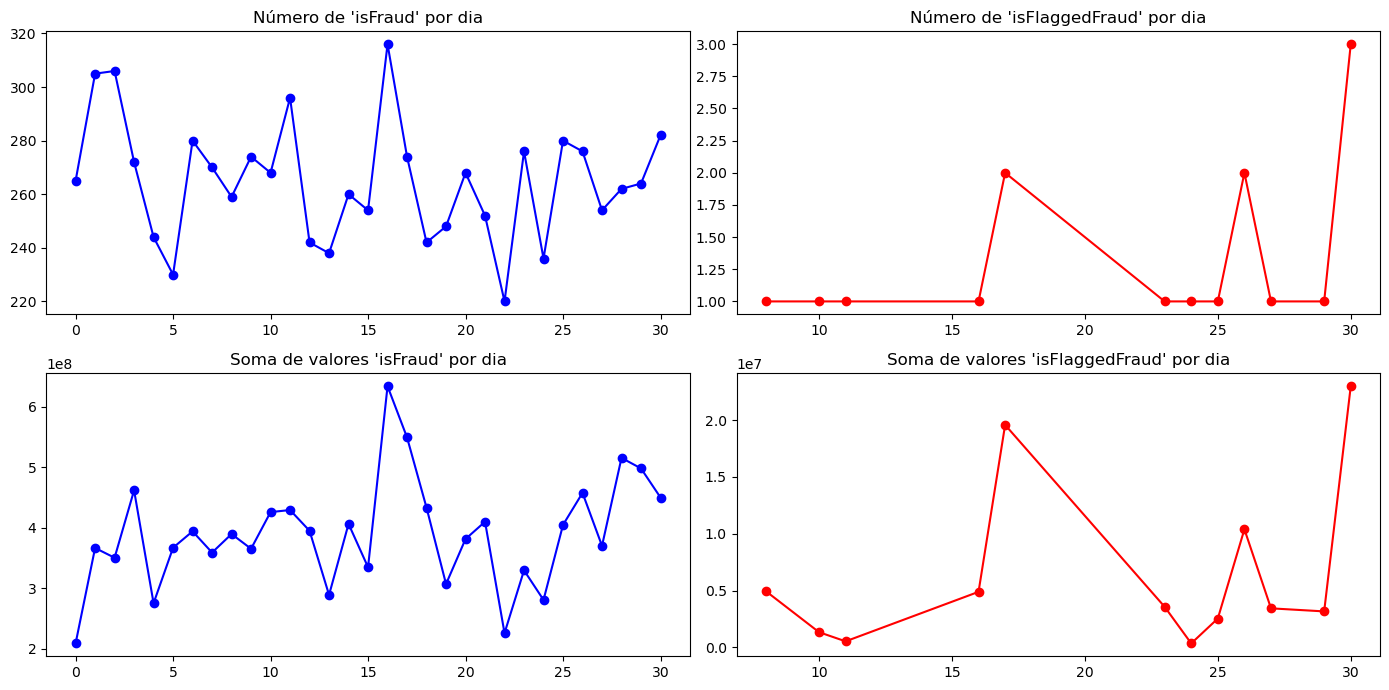

In [12]:
# Contagem diária de transações fraudulentas (isFraud)
# Agrupamos por 'step' e 'isFraud' para contar o número de ocorrências de fraudes por hora
df_isFraud = df.groupby(['step', 'isFraud']).size().reset_index(name='count')
# Filtramos apenas as transações com 'isFraud' igual a 1
df_isFraud = df_isFraud[df_isFraud['isFraud'] == 1]
# Calculamos o dia com base na divisão por 24 (considerando cada dia com 24 horas)
df_isFraud['dia'] = df_isFraud['step'] // 24
# Agrupamos por 'dia' e somamos as ocorrências de fraudes
df_isFraud = df_isFraud.groupby(['dia'])['count'].sum().reset_index(name='sum')

# Contagem diária de transações sinalizadas como suspeitas (isFlaggedFraud)
# Agrupamos por 'step' e 'isFlaggedFraud' para contar as transações sinalizadas por hora
df_isFlaggedFraud = df.groupby(['step', 'isFlaggedFraud']).size().reset_index(name='count')
# Filtramos apenas as transações sinalizadas como suspeitas
df_isFlaggedFraud = df_isFlaggedFraud[df_isFlaggedFraud['isFlaggedFraud'] == 1]
# Calculamos o dia e somamos as ocorrências por dia
df_isFlaggedFraud['dia'] = df_isFlaggedFraud['step'] // 24
df_isFlaggedFraud = df_isFlaggedFraud.groupby(['dia'])['count'].sum().reset_index(name='sum')

# Soma dos valores fraudulentos (isFraud) por dia
# Agrupamos por 'step' e 'isFraud' e somamos os valores das transações (amount)
df_isFraud_sum = df.groupby(['step', 'isFraud'])['amount'].sum().reset_index(name='sum')
# Filtramos apenas as transações fraudulentas
df_isFraud_sum = df_isFraud_sum[df_isFraud_sum['isFraud'] == 1]
# Calculamos o dia e somamos os valores por dia
df_isFraud_sum['dia'] = df_isFraud_sum['step'] // 24
df_isFraud_sum = df_isFraud_sum.groupby(['dia'])['sum'].sum().reset_index(name='sum')

# Soma dos valores de transações sinalizadas como suspeitas (isFlaggedFraud) por dia
# Agrupamos por 'step' e 'isFlaggedFraud' e somamos os valores das transações
df_isFlaggedFraud_sum = df.groupby(['step', 'isFlaggedFraud'])['amount'].sum().reset_index(name='sum')
# Filtramos apenas as transações sinalizadas
df_isFlaggedFraud_sum = df_isFlaggedFraud_sum[df_isFlaggedFraud_sum['isFlaggedFraud'] == 1]
# Calculamos o dia e somamos os valores por dia
df_isFlaggedFraud_sum['dia'] = df_isFlaggedFraud_sum['step'] // 24
df_isFlaggedFraud_sum = df_isFlaggedFraud_sum.groupby(['dia'])['sum'].sum().reset_index(name='sum')

# Criando gráficos das análises diárias
fig, axes = plt.subplots(2, 2, figsize=(14, 7))

# Número de fraudes ('isFraud') por dia
axes[0, 0].plot(df_isFraud['dia'], df_isFraud['sum'], marker='o', color='blue')
axes[0, 0].set_title("Número de 'isFraud' por dia")

# Número de transações sinalizadas ('isFlaggedFraud') por dia
axes[0, 1].plot(df_isFlaggedFraud['dia'], df_isFlaggedFraud['sum'], marker='o', color='red')
axes[0, 1].set_title("Número de 'isFlaggedFraud' por dia")

# Soma dos valores de fraudes ('isFraud') por dia
axes[1, 0].plot(df_isFraud_sum['dia'], df_isFraud_sum['sum'], marker='o', color='blue')
axes[1, 0].set_title("Soma de valores 'isFraud' por dia")

# Soma dos valores de transações sinalizadas ('isFlaggedFraud') por dia
axes[1, 1].plot(df_isFlaggedFraud_sum['dia'], df_isFlaggedFraud_sum['sum'], marker='o', color='red')
axes[1, 1].set_title("Soma de valores 'isFlaggedFraud' por dia")

plt.tight_layout()
plt.show()


In [13]:
# Cálculo e exibição da média diária de ocorrências de fraude (isFraud)
print("Média de 'isFraude' por dia:", round(df_isFraud['sum'].mean()))

# Cálculo e exibição da média diária de ocorrências de transações sinalizadas como suspeitas (isFlaggedFraud)
print("Média de 'isFlaggedFraud' por dia:", round(df_isFlaggedFraud['sum'].mean()))

print("")  # Linha vazia para melhor organização visual na saída

# Cálculo e exibição da média diária dos valores movimentados em fraudes (isFraud)
print("Valores de 'isFraude' por dia: $", round(df_isFraud_sum['sum'].mean()))

# Cálculo e exibição da média diária dos valores movimentados em transações sinalizadas (isFlaggedFraud)
print("Valores de 'isFlaggedFraud' por dia: $", round(df_isFlaggedFraud_sum['sum'].mean()))


Média de 'isFraude' por dia: 265
Média de 'isFlaggedFraud' por dia: 1

Valores de 'isFraude' por dia: $ 388916627
Valores de 'isFlaggedFraud' por dia: $ 6482130


In [14]:
# Filtra o DataFrame para apenas as transações onde 'isFlaggedFraud' é igual a 1
# Seleciona as colunas 'step', 'amount' e 'isFlaggedFraud' para análise
df[df['isFlaggedFraud'] == 1][['step', 'amount', 'isFlaggedFraud']].describe()


,step,amount,isFlaggedFraud
count,16.000000,1.600000e+01,16.0
mean,537.562500,4.861598e+06,1.0
std,181.895196,3.572499e+06,0.0
min,212.000000,3.538742e+05,1.0
25%,415.500000,2.242749e+06,1.0
50%,601.500000,4.234245e+06,1.0
75%,678.750000,7.883451e+06,1.0
max,741.000000,1.000000e+07,1.0


In [15]:
# Filtra o DataFrame para apenas as transações onde 'isFlaggedFraud' é igual a 1
# Seleciona as colunas 'step', 'amount' e 'isFlaggedFraud' para análise
df[df['isFlaggedFraud'] == 1][['step', 'amount', 'isFlaggedFraud']].describe()

,step,amount,isFlaggedFraud
count,16.000000,1.600000e+01,16.0
mean,537.562500,4.861598e+06,1.0
std,181.895196,3.572499e+06,0.0
min,212.000000,3.538742e+05,1.0
25%,415.500000,2.242749e+06,1.0
50%,601.500000,4.234245e+06,1.0
75%,678.750000,7.883451e+06,1.0
max,741.000000,1.000000e+07,1.0


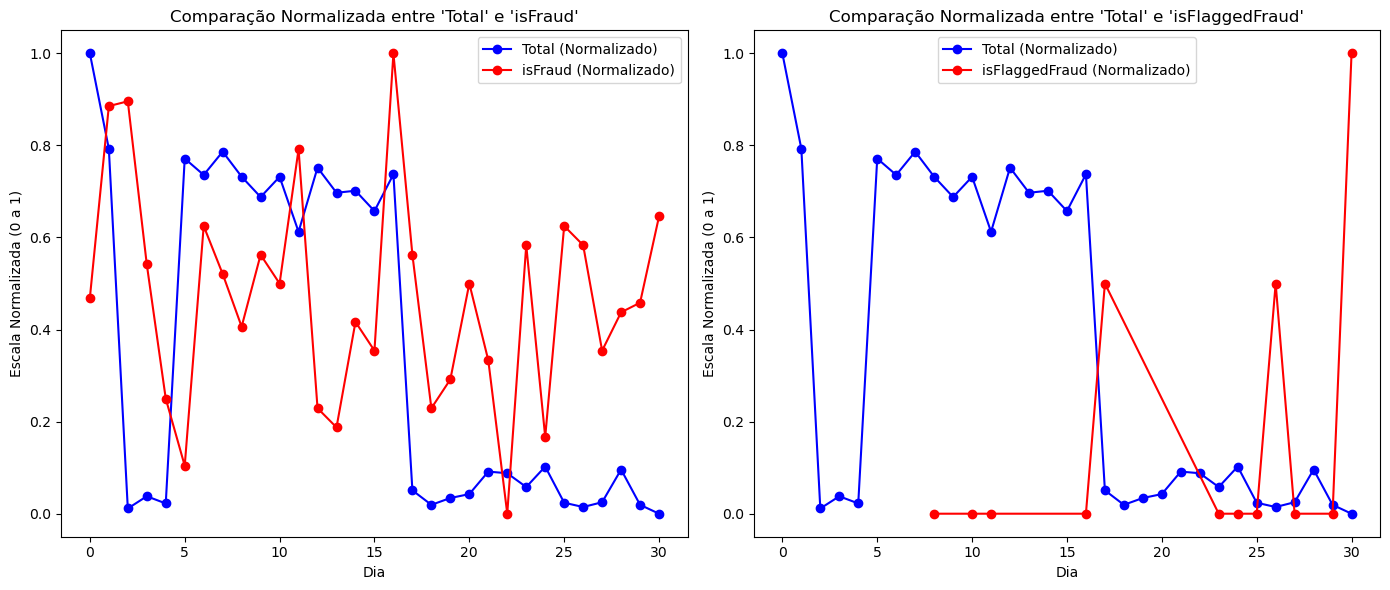

In [16]:
# Normalizando as colunas 'count' e 'sum' para ambas as tabelas
scaler = MinMaxScaler()

df_total['count_normalized'] = scaler.fit_transform(df_total[['count']])
df_isFraud['sum_normalized'] = scaler.fit_transform(df_isFraud[['sum']])
df_isFlaggedFraud['sum_normalized']  = scaler.fit_transform(df_isFlaggedFraud[['sum']])

# Plotando os gráficos com os valores normalizados
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Gráfico 1: Comparação entre 'Total' e 'isFraud'
axes[0].plot(df_total['dia'], df_total['count_normalized'], marker='o', color='blue', label='Total (Normalizado)')
axes[0].plot(df_isFraud['dia'], df_isFraud['sum_normalized'], marker='o', color='red', label='isFraud (Normalizado)')
axes[0].set_title("Comparação Normalizada entre 'Total' e 'isFraud'")
axes[0].set_xlabel("Dia")
axes[0].set_ylabel("Escala Normalizada (0 a 1)")
axes[0].legend()

# Gráfico 2: Comparação entre 'Total' e 'isFlaggedFraud'
axes[1].plot(df_total['dia'], df_total['count_normalized'], marker='o', color='blue', label='Total (Normalizado)')
axes[1].plot(df_isFlaggedFraud['dia'], df_isFlaggedFraud['sum_normalized'], marker='o', color='red', label='isFlaggedFraud (Normalizado)')
axes[1].set_title("Comparação Normalizada entre 'Total' e 'isFlaggedFraud'")
axes[1].set_xlabel("Dia")
axes[1].set_ylabel("Escala Normalizada (0 a 1)")
axes[1].legend()

plt.tight_layout()  # Ajusta o layout para evitar sobreposição
plt.show()


# Pré-Processamento dos dados

### Tratamento de valores ausentes

Não há valores nulos nesse dataset

In [17]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
taxa              0
dtype: int64

### Selecao das variaveis

In [ ]:
# Remove as colunas 'nameDest' e 'nameOrig' do DataFrame original, criando um novo DataFrame 'df1' sem esses identificadores de conta.
# Exibe informações sobre o DataFrame atualizado, incluindo o número de colunas, tipo de dados e quantidade de valores não nulos em cada coluna.
df1 = df.drop(['nameDest', 'nameOrig'], axis=1)
df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 10 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   oldbalanceOrg   float64
 4   newbalanceOrig  float64
 5   oldbalanceDest  float64
 6   newbalanceDest  float64
 7   isFraud         int64  
 8   isFlaggedFraud  int64  
 9   taxa            int32  
dtypes: float64(5), int32(1), int64(3), object(1)
memory usage: 461.2+ MB


In [ ]:
# Converte a coluna categórica 'type' em variáveis dummies para cada tipo de transação, criando colunas binárias.
# Define essas colunas como inteiros para otimizar o armazenamento e o processamento.
# O parâmetro 'drop_first=True' remove uma das categorias (CASH_IN) para evitar multicolinearidade.
df_encoded = pd.get_dummies(df1, columns=['type'], drop_first=True)
df_encoded[['type_CASH_OUT', 'type_DEBIT', 'type_PAYMENT', 'type_TRANSFER']] = df_encoded[['type_CASH_OUT', 'type_DEBIT', 'type_PAYMENT', 'type_TRANSFER']].astype(int)
df_encoded


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,taxa,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,170136.00,160296.36,0.00,0.00,0,0,0,0,0,1,0
1,1,1864.28,21249.00,19384.72,0.00,0.00,0,0,0,0,0,1,0
2,1,181.00,181.00,0.00,0.00,0.00,1,0,0,0,0,0,1
3,1,181.00,181.00,0.00,21182.00,0.00,1,0,0,1,0,0,0
4,1,11668.14,41554.00,29885.86,0.00,0.00,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,339682.13,339682.13,0.00,0.00,339682.13,1,0,0,1,0,0,0
6362616,743,6311409.28,6311409.28,0.00,0.00,0.00,1,0,0,0,0,0,1
6362617,743,6311409.28,6311409.28,0.00,68488.84,6379898.11,1,0,0,1,0,0,0
6362618,743,850002.52,850002.52,0.00,0.00,0.00,1,0,0,0,0,0,1


### Balanceamento dos targets

In [ ]:
from sklearn.utils import resample

# Separa as classes majoritária e minoritária no DataFrame
df_encoded_0 = df_encoded[df_encoded['isFraud'] == 0]
df_encoded_1 = df_encoded[df_encoded['isFraud'] == 1]

# Reduz o tamanho da classe majoritária para igualar ao da classe minoritária,
# utilizando amostragem aleatória sem reposição
df_encoded_0 = resample(df_encoded_0, 
                        replace=False, 
                        n_samples=len(df_encoded_1), 
                        random_state=42)

# Combina as duas classes em um novo DataFrame balanceado
df_balanced = pd.concat([df_encoded_0, df_encoded_1])

# Exibe a contagem das classes no novo DataFrame balanceado e suas dimensões
print(df_balanced['isFraud'].value_counts())
print(df_balanced.shape)

# Separa o alvo ('isFraud') das demais variáveis para treinamento do modelo
y = df_balanced['isFraud']
x = df_balanced.drop(['isFraud'], axis=1)






isFraud
0    8213
1    8213
Name: count, dtype: int64
(16426, 13)


#### Divisão dos dados em treino/validação

In [ ]:
# Divide os dados em conjuntos de treino e teste, com 20% dos dados destinados para teste
# Define uma random_state para garantir a reprodutibilidade da divisão

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)




## Normalização

In [ ]:
# Normalizando os dados de treino e teste com StandardScaler para padronizar as variáveis
# Ajusta o scaler nos dados de treino e aplica a transformação aos dados de treino e teste

scaler = StandardScaler()
x_train_scaler = scaler.fit_transform(x_train)
x_test_scaler = scaler.transform(x_test)




# Construção de modelos de machine learning

A função selecao_modelo foi desenvolvida para avaliar diferentes modelos de classificação, utilizando validação cruzada com 5 folds. Dentro da função, um dicionário armazena diversos modelos, como RandomForestClassifier, LogisticRegression, KNeighborsClassifier e XGBClassifier. Para cada modelo, a função realiza o treinamento com os dados de entrada (x_train e y_train) e calcula a acurácia em cada fold da validação cruzada. Além disso, a função imprime a acurácia de cada fold e a média geral de acurácia. Esse processo é fundamental para comparar o desempenho dos modelos e escolher aquele que apresenta a melhor performance para o problema de classificação, facilitando a seleção do modelo mais adequado.

In [ ]:
# Função para seleção de modelos de classificação com validação cruzada
# Avalia cada modelo do dicionário, imprimindo a acurácia em cada fold e a média dos resultados

def selecao_modelo(x_train, y_train):
    
    # Dicionário de modelos a serem avaliados
    dicionario = {
        'RandomForestClassifier': RandomForestClassifier(),
        'LogisticRegression'    : LogisticRegression(), 
        'KNeighborsClassifier'  : KNeighborsClassifier(),
        'XGBClassifier'         : XGBClassifier()
    }

    # Loop através de cada modelo no dicionário
    for nome_modelo, modelo in dicionario.items():
        modelo.fit(x_train, y_train)  # Treina o modelo
        cv_scores = cross_val_score(modelo, x_train, y_train, cv=5)  # Validação cruzada com 5 folds
        print("\n", nome_modelo, "\n")
        print("Acurácia em cada fold:", cv_scores)
        print("Acurácia média:", np.mean(cv_scores))


In [24]:
selecao_modelo(x_train_scaler,y_train)


 RandomForestClassifier 

Acurácia em cada fold: [0.99771689 0.99771689 0.99847793 0.99923896 0.99809741]
Acurácia média: 0.9982496194824961

 LogisticRegression 

Acurácia em cada fold: [0.97488584 0.9783105  0.97260274 0.97716895 0.97488584]
Acurácia média: 0.9755707762557077

 KNeighborsClassifier 

Acurácia em cada fold: [0.9783105  0.97945205 0.97640791 0.98211568 0.9783105 ]
Acurácia média: 0.9789193302891933

 XGBClassifier 

Acurácia em cada fold: [0.99771689 0.99847793 0.99809741 0.99847793 0.99809741]
Acurácia média: 0.9981735159817351


#### Redes Neurais

Além de testar os modelos do scikit-learn, também decidi avaliar o desempenho de um modelo LSTM (Long Short-Term Memory) do Keras. Para isso, os dados foram convertidos e reestruturados para se ajustarem à entrada do modelo LSTM. Em seguida, os dados foram divididos em 5 folds utilizando validação cruzada, onde o modelo LSTM foi treinado e avaliado em cada fold. O processo foi repetido em loop para garantir uma análise mais robusta da acurácia do modelo em diferentes subconjuntos de dados. Com isso, foi possível calcular a acurácia média, fornecendo uma visão mais precisa do desempenho do modelo.

In [ ]:
# Certifique-se de que y seja um array NumPy para evitar problemas de indexação

x_array = np.array(x)  # Convertendo X para um array NumPy
x_reshape = x_array.reshape((x_array.shape[0], 1, x_array.shape[1]))  # Redimensionando para a entrada do LSTM
y_array = np.array(y)  # Convertendo y para um array NumPy

kfold = KFold(n_splits=5, shuffle=True, random_state=42)  # Divisão dos dados em 5 folds
accuracy_scores = []  # Lista para armazenar as acurácias de cada fold

for train_index, test_index in kfold.split(x_reshape):  # Dividindo os dados em treino e teste para cada fold
    x_train_reshape, x_test_reshape = x_reshape[train_index], x_reshape[test_index]
    y_train_lstm, y_test_lstm = y_array[train_index], y_array[test_index]
    
    # Criando o modelo LSTM para cada fold
    model = Sequential()
    model.add(LSTM(50, input_shape=(x_train_reshape.shape[1], x_train_reshape.shape[2]), return_sequences=True))  # Primeira camada LSTM
    model.add(Dropout(0.2))  # Regularização (Dropout)
    model.add(LSTM(50))  # Segunda camada LSTM
    model.add(Dropout(0.2))  # Regularização (Dropout)
    model.add(Dense(1, activation='sigmoid'))  # Camada de saída para classificação binária
    
    # Compilando o modelo
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])  # Função de perda e otimizador
    
    # Treinando o modelo
    model.fit(x_train_reshape, y_train_lstm, epochs=50, batch_size=32, validation_data=(x_test_reshape, y_test_lstm), verbose=0)
    
    # Avaliando o modelo no fold de teste
    loss, accuracy = model.evaluate(x_test_reshape, y_test_lstm, verbose=0)
    accuracy_scores.append(accuracy)  # Armazenando a acurácia de cada fold
    print(f"Acurácia no fold: {accuracy:.4f}")

# Calculando e exibindo a média e o desvio padrão da acurácia
acuracia_lstm = np.mean(accuracy_scores)  # Média da acurácia
print("Acuracia média:", acuracia_lstm)  # Exibindo a acurácia média


c:\Users\jrfer\anaconda3\envs\Projetos\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Acurácia no fold: 0.9227
Acurácia no fold: 0.9318
Acurácia no fold: 0.9263
Acurácia no fold: 0.9674
Acurácia no fold: 0.9266
Acuracia média: 0.9349818825721741


#### Fine-Tunning

In [26]:
# Parâmetros para o GridSearch
param_grid = {
    'n_estimators': [100, 200],         # Limitar valores iniciais
    'learning_rate': [0.1, 0.2],        # Taxas de aprendizado comuns
    'max_depth': [3, 5],                # Profundidades razoáveis para evitar overfitting
    'subsample': [0.8],                 # Fixar subsample em um valor moderado
    'colsample_bytree': [0.8],          # Fixar colsample_bytree para evitar combinações desnecessárias
}

# Configurar o GridSearchCV
grid_search = GridSearchCV(estimator=XGBClassifier(), param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Ajustar o modelo aos dados
grid_search.fit(x_train_scaler, y_train)

# Melhor modelo e parâmetros
print("Melhores parâmetros encontrados:", grid_search.best_params_)
print("Melhor acurácia:", grid_search.best_score_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


c:\Users\jrfer\anaconda3\envs\Projetos\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
1 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\jrfer\anaconda3\envs\Projetos\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\jrfer\anaconda3\envs\Projetos\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\jrfer\anaconda3\envs\Projetos\Lib\site-packages\xgboost\sklearn.py", line 1512, in fit
    train_dmatrix, evals

Melhores parâmetros encontrados: {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.8}
Melhor acurácia: 0.9983257229832573


Acurácia:  0.9984783931832014

 Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1649
           1       1.00      1.00      1.00      1637

    accuracy                           1.00      3286
   macro avg       1.00      1.00      1.00      3286
weighted avg       1.00      1.00      1.00      3286



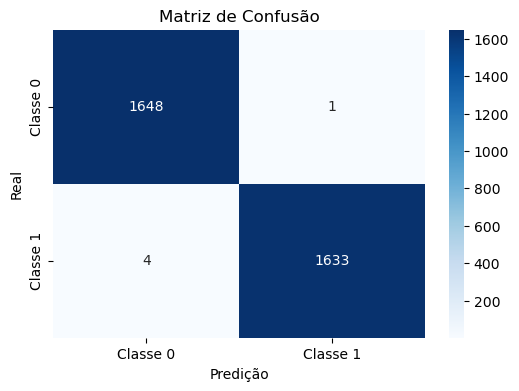

In [ ]:
# Definindo o modelo XGBoost com hiperparâmetros específicos
modelo = XGBClassifier(colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=100, subsample=0.8)

# Treinando o modelo
modelo.fit(x_train_scaler, y_train)

# Realizando previsões no conjunto de teste
y_pred = modelo.predict(x_test_scaler)

# Calculando a acurácia
acuracia = accuracy_score(y_test, y_pred)
print("Acurácia: ", acuracia)

# Gerando o relatório de classificação (precisão, recall, f1-score)
relatorio = classification_report(y_test, y_pred)
print("\n Relatório de Classificação:\n", relatorio)

# Calculando a matriz de confusão
matriz_confusao = confusion_matrix(y_test, y_pred)

# Plotando a matriz de confusão com Seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(matriz_confusao, annot=True, fmt="d", cmap="Blues", xticklabels=["Classe 0", "Classe 1"], yticklabels=["Classe 0", "Classe 1"])
plt.title("Matriz de Confusão")
plt.xlabel("Predição")
plt.ylabel("Real")
plt.show()


# Avaliação do Modelo

Testando nosso modelo na parcela de 20% dos dados de teste, observamos que o desempenho é relativamente bom. No entanto, podemos notar alguns pontos de atenção. A matriz de confusão nos mostra o seguinte:

### Matriz de Confusão:

- **Verdadeiros Positivos (VP = 1648):** O modelo acertou 1648 transações legítimas corretamente, classificando-as como "não fraude".
- **Falsos Positivos (FP = 1):** Uma transação legítima foi erroneamente classificada como fraude.
- **Falsos Negativos (FN = 4):** Quatro transações fraudulentas foram classificadas erroneamente como legítimas (ou seja, fraude não detectada).
- **Verdadeiros Negativos (VN = 1633):** O modelo acertou 1633 transações fraudulentas, classificando-as corretamente como "fraude".

Embora os resultados sejam bastante positivos, ainda temos alguns **falsos negativos** e **falsos positivos**, que podem ser ajustados. Especificamente, os **falsos negativos** indicam que o modelo deixou passar algumas fraudes, e os **falsos positivos** indicam que uma transação legítima foi incorretamente classificada como fraude.

Esses resultados podem ser ajustados por meio da modificação do limite de decisão (**threshold**) do modelo. Ao alterar esse limite, podemos fazer um trade-off entre a sensibilidade (detectar mais fraudes) e a especificidade (evitar classificar transações legítimas como fraude). Por exemplo, diminuir o **threshold** pode aumentar a detecção de fraudes (reduzindo os falsos negativos), mas também pode aumentar os falsos positivos. Já aumentar o **threshold** pode reduzir os falsos positivos, mas ao custo de aumentar os falsos negativos.
